In [154]:
"""
The purpose of the code snippet below is to graphically display a meta stock price chart 
and a rolling average from the preceding period.
At the secondary Y axe, there is sales volume placed.
This kind of charts can be helpful in buy/sell analysis for stock market.

It has beed created as an example for data loading and grafic presentation with usage of pandas and matplotlib libraries.
"""


import pandas as pd


def remove_dollar(x):
    if x[0]=='$':
        return float(x[1:])

data = pd.read_csv(
    'HistoricalData_1675109792025.csv',
    parse_dates=['Date'],
    index_col='Date',
).sort_index().assign(
    Close = lambda x: x['Close/Last'].map(remove_dollar),
    Open = lambda x: x['Open'].map(remove_dollar),
    High = lambda x: x['High'].map(remove_dollar),
    Low = lambda x: x['Low'].map(remove_dollar),
    Close_mean = lambda x: x['Close'].rolling('14D').mean() 
).drop(columns='Close/Last')

data.plot(
    y = ['Close', 'Close_mean','Volume'],
    ylabel = 'Cena akcji [$]',
    grid=True,
    secondary_y = ['Volume'],
    figsize=(15,5)
)

data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2022-01-31 to 2023-01-27
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Volume      250 non-null    int64  
 1   Open        250 non-null    float64
 2   High        250 non-null    float64
 3   Low         250 non-null    float64
 4   Close       250 non-null    float64
 5   Close_mean  250 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


<AxesSubplot: xlabel='Date'>

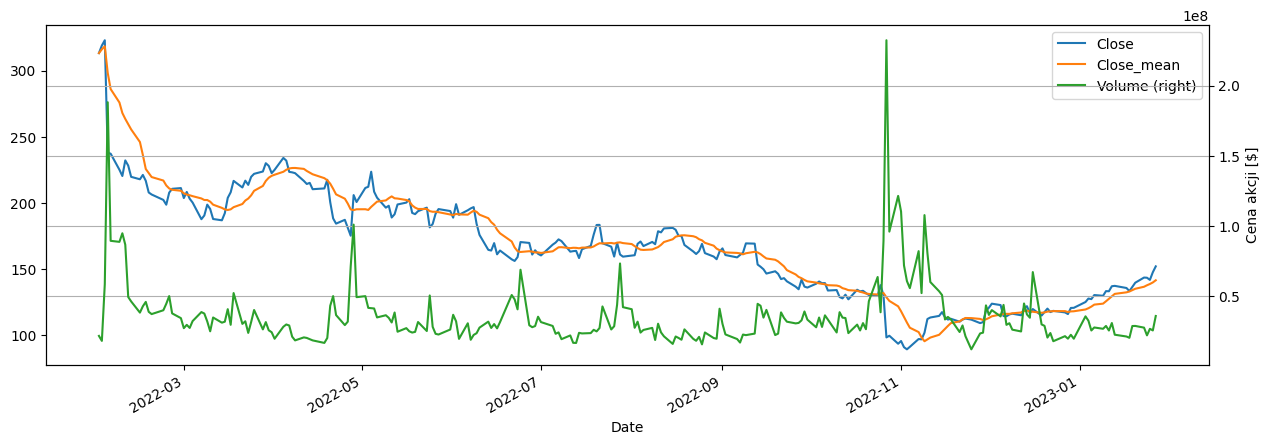

In [156]:
data.plot(
    y = ['Close', 'Close_mean','Volume'],
    ylabel = 'Cena akcji [$]',
    grid=True,
    secondary_y = ['Volume'],
    figsize=(15,5)
)